BeautifulSoup4

In [1]:
pip install beautifulSoup4


In [2]:

from bs4 import BeautifulSoup


In [3]:
# HTML 문서를 문자열 html로 저장
html = '''
<html>
    <head>
    </head>
    <body>
        <h1> 장바구니
            <p id='clothes' class='name' title='라운드티'> 라운드티
                <span class = 'number'> 25 </span>
                <span class = 'price'> 29000 </span>
                <span class = 'menu'> 의류</span>
                <a href = 'http://www.naver.com'> 바로가기 </a>
            </p>
            <p id='watch' class='name' title='시계'> 시계
                <span class = 'number'> 28 </span>
                <span class = 'price'> 32000 </span>
                <span class = 'menu'> 악세서리 </span>
                <a href = 'http://www.facebook.com'> 바로가기 </a>
            </p>
        </h1>
    </body>
</html>
'''


In [4]:
# BeautifulSoup 인스턴스 생성. 두번째 매개변수는 분석할 분석기(parser)의 종류.
soup = BeautifulSoup(html, 'html.parser')

- soup.select('태그명') : 태그를 입력으로 사용할 경우
- soup.select('.클래스명') : 클래스를 입력으로 사용할 경우
- soup.select('#아이디') : ID를 입력으로 사용할 경우
- soup.select('상위태그 하위태그') : 자손 관계 (띄어쓰기)
- soup.select('상위태그 > 하위태그') : 자식 관계 ( > )

In [5]:
# <body> 태그를 입력
print(soup.select('body'))

[<body>
<h1> 장바구니
            <p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>
<p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>
</h1>
</body>]


In [6]:
print(soup.select('h1 .name .menu'))

[<span class="menu"> 의류</span>, <span class="menu"> 악세서리 </span>]


In [7]:
print(soup.select('html > h1'))

[]


##  pd.read_html()을 통한 테마주 추출

In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [11]:
import requests
import pandas as pd
url = 'https://finance.naver.com/world/sise.naver?symbol=DJI@DJI#'
response = requests.get(url)
pd.read_html(response.text, encoding='euc-kr')

[               0              1                  2
 0  전일  33,119.57  고가  33,557.69  52주 최고  35,679.13
 1  시가  33,040.70  저가  32,846.94  52주 최저  28,660.94,
            일자        종가    전일대비        시가        고가        저가
 0  2023.10.06  33407.58  288.01  33040.70  33557.69  32846.94
 1  2023.10.05  33119.57    9.98  33099.23  33174.38  32941.56
 2  2023.10.04  33129.55  127.17  33034.18  33156.45  32873.23
 3  2023.10.03  33002.38  430.97  33318.84  33398.54  32916.20
 4  2023.10.02  33433.35   74.15  33455.50  33511.91  33219.56
 5  2023.09.29  33507.50  158.84  33882.61  33893.68  33407.45
 6  2023.09.28  33666.34  116.07  33519.44  33777.90  33473.50
 7  2023.09.27  33550.27   68.61  33682.81  33731.65  33306.30
 8  2023.09.26  33618.88  388.00  33862.68  33879.93  33569.60
 9  2023.09.25  34006.88   43.04  33907.59  34017.53  33780.67,
 Empty DataFrame
 Columns: [업체명, 거래량, 전일비]
 Index: []]

In [10]:
len(pd.read_html(url))

3

In [12]:
pd.read_html(response.text, encoding='euc-kr')[0]

,0,1,2
0,"전일 33,119.57","고가 33,557.69","52주 최고 35,679.13"
1,"시가 33,040.70","저가 32,846.94","52주 최저 28,660.94"


In [13]:
pd.read_html(response.text, encoding='euc-kr')[1]

,일자,종가,전일대비,시가,고가,저가
0,2023.10.06,33407.58,288.01,33040.70,33557.69,32846.94
1,2023.10.05,33119.57,9.98,33099.23,33174.38,32941.56
2,2023.10.04,33129.55,127.17,33034.18,33156.45,32873.23
3,2023.10.03,33002.38,430.97,33318.84,33398.54,32916.20
4,2023.10.02,33433.35,74.15,33455.50,33511.91,33219.56
5,2023.09.29,33507.50,158.84,33882.61,33893.68,33407.45
6,2023.09.28,33666.34,116.07,33519.44,33777.90,33473.50
7,2023.09.27,33550.27,68.61,33682.81,33731.65,33306.30
8,2023.09.26,33618.88,388.00,33862.68,33879.93,33569.60
9,2023.09.25,34006.88,43.04,33907.59,34017.53,33780.67


In [14]:
pd.read_html(response.text, encoding='euc-kr')[2]

,업체명,거래량,전일비


## 웹스크래핑 실습 : 종목의 캔들 차트

## 01) 종목의 가격 데이터 크롤링
### 한국금융지주 종가 크롤링

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from matplotlib import dates as mdates
from bs4 import BeautifulSoup as bs

한국금융지주의 일별 종가, 전일비, 시가, 고가, 저가, 거래량이 업데이트 되고 있는 사이트

In [17]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=071050&page=1'


HTML 코드를 받아오는 방법
- response = requests.get(url)
- response.text



In [18]:
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
response = requests.get(url, headers=headers)

In [19]:
response.text


'\n<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>네이버페이 증권</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230919111844/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230919111844/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230919111844/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230919111844/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230919111844/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230919111844/css/newstock3.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230919111844/css/world.css">\n</head>\n<body>\n<scri

BeautifulSoup4를 통해서 해당 HTML 코드를 파싱

In [20]:
html = bs(response.text, 'html.parser')
html_table = html.select("table")
table = pd.read_html(str(html_table))
print('파싱된 테이블의 개수 :', len(table))

파싱된 테이블의 개수 : 2


In [21]:
table[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.10.06,51900.0,500.0,52700.0,52700.0,51600.0,63680.0
2,2023.10.05,52400.0,700.0,51900.0,52800.0,51800.0,114987.0
3,2023.10.04,51700.0,1400.0,52600.0,52600.0,50800.0,135538.0
4,2023.09.27,53100.0,300.0,53000.0,53800.0,52500.0,113732.0
5,2023.09.26,53400.0,2100.0,55100.0,55200.0,53100.0,109353.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.09.25,55500.0,700.0,54800.0,56400.0,54800.0,120292.0


In [22]:
table[1]


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


In [24]:
# 결측값을 제거하여 출력
table[0].dropna()


,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.10.06,51900.0,500.0,52700.0,52700.0,51600.0,63680.0
2,2023.10.05,52400.0,700.0,51900.0,52800.0,51800.0,114987.0
3,2023.10.04,51700.0,1400.0,52600.0,52600.0,50800.0,135538.0
4,2023.09.27,53100.0,300.0,53000.0,53800.0,52500.0,113732.0
5,2023.09.26,53400.0,2100.0,55100.0,55200.0,53100.0,109353.0
9,2023.09.25,55500.0,700.0,54800.0,56400.0,54800.0,120292.0
10,2023.09.22,54800.0,800.0,55000.0,55300.0,54000.0,128555.0
11,2023.09.21,55600.0,1100.0,56000.0,56900.0,55400.0,113993.0
12,2023.09.20,56700.0,800.0,57500.0,57500.0,56400.0,68939.0
13,2023.09.19,57500.0,1100.0,56000.0,57800.0,56000.0,178225.0


In [26]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=071050'
for page in range(1, 100):
    page_url = '{}&page={}'.format(sise_url, page)
    print(page_url)

    # 위에서 했던 일련의 과정들을 각 url에 대해서 (99페이지에 대해서 반복)
    response = requests.get(page_url, headers=headers)
    html = bs(response.text, 'html.parser')
    html_table = html.select("table")
    table = pd.read_html(str(html_table))

    # 현재 얻은 데이터프레임을 기존 데이터프레임에 누적.
    df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=1


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=2


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=3


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=4


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=5


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=6


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=7


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=8


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=9


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=10


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=11


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=12


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=13


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=14


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=15


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=16


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=17


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=18


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=19


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=20


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=21


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=22


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=23


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=24


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=25


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=26


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=27


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=28


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=29


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=30


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=31


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=32


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=33


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=34


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=35


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=36


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=37


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=38


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=39


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=40


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=41


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=42


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=43


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=44


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=45


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=46


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=47


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=48


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=49


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=50


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=51


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=52


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=53


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=54


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=55


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=56


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=57


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=58


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=59


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=60


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=61


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=62


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=63


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=64


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=65


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=66


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=67


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=68


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=69


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=70


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=71


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=72


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=73


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=74


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=75


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=76


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=77


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=78


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=79


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=80


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=81


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=82


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=83


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=84


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=85


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=86


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=87


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=88


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=89


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=90


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=91


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=92


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=93


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=94


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=95


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=96


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=97


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=98


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


https://finance.naver.com/item/sise_day.nhn?code=071050&page=99


<ipython-input-26-14a0df3b474e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())


In [27]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.10.06,51900.0,500.0,52700.0,52700.0,51600.0,63680.0
2,2023.10.05,52400.0,700.0,51900.0,52800.0,51800.0,114987.0
3,2023.10.04,51700.0,1400.0,52600.0,52600.0,50800.0,135538.0
4,2023.09.27,53100.0,300.0,53000.0,53800.0,52500.0,113732.0
5,2023.09.26,53400.0,2100.0,55100.0,55200.0,53100.0,109353.0
...,...,...,...,...,...,...,...
9,2019.10.11,72200.0,400.0,72800.0,73800.0,71800.0,161127.0
10,2019.10.10,71800.0,600.0,71500.0,72300.0,71200.0,547548.0
11,2019.10.08,72400.0,200.0,72900.0,73000.0,71300.0,130006.0
12,2019.10.07,72200.0,300.0,73000.0,73000.0,71700.0,84901.0


In [28]:
# 오름차순으로 변경
df = df.dropna()
df = df.iloc[0:30]
df = df.sort_values(by='날짜')
df

,날짜,종가,전일비,시가,고가,저가,거래량
13,2023.08.22,51000.0,600.0,50500.0,51900.0,50500.0,78708.0
12,2023.08.23,50700.0,300.0,50700.0,51300.0,50300.0,72253.0
11,2023.08.24,50500.0,200.0,51000.0,51000.0,50200.0,74010.0
10,2023.08.25,50700.0,200.0,50000.0,51000.0,50000.0,81124.0
9,2023.08.28,51400.0,700.0,51500.0,51500.0,50700.0,50617.0
5,2023.08.29,52100.0,700.0,51500.0,52300.0,51300.0,83109.0
4,2023.08.30,51900.0,200.0,52500.0,52500.0,51600.0,48678.0
3,2023.08.31,52000.0,100.0,51900.0,52300.0,51600.0,123853.0
2,2023.09.01,51900.0,100.0,51500.0,52200.0,51500.0,99193.0
1,2023.09.04,53300.0,1400.0,51500.0,53400.0,51400.0,136186.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50997 (\N{HANGUL SYLLABLE YUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

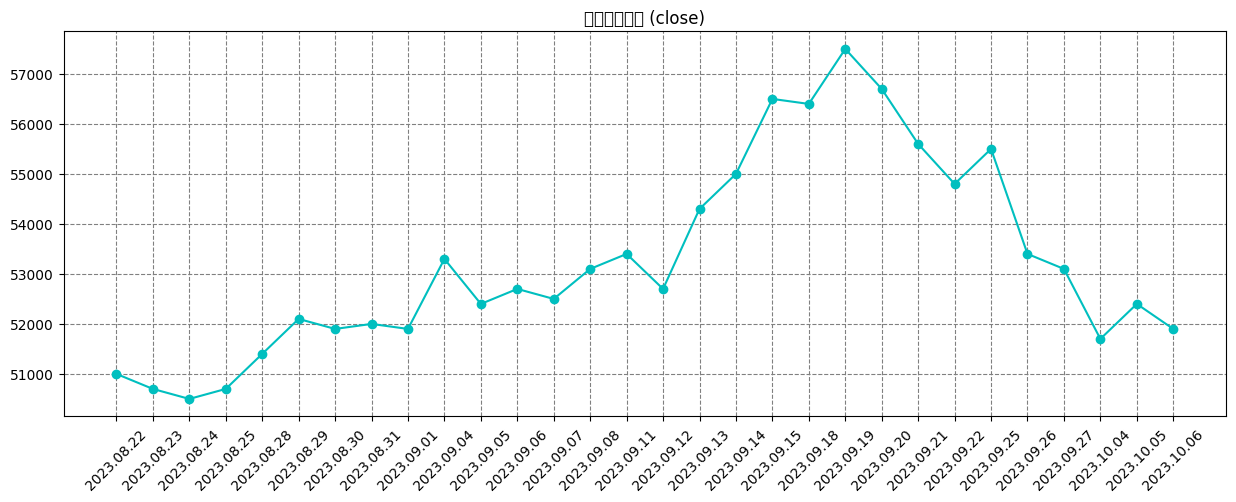

In [29]:
plt.figure(figsize=(15, 5))
plt.title('한국금융지주 (close)')
plt.xticks(rotation=45)
plt.plot(df['날짜'], df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()

## 02) 캔들차트 시각화
캔들에 대한 기본 지식 : https://m.blog.naver.com/freeism_7/221866826086


In [33]:
# 구버전 설치
!pip install --upgrade mpl_finance

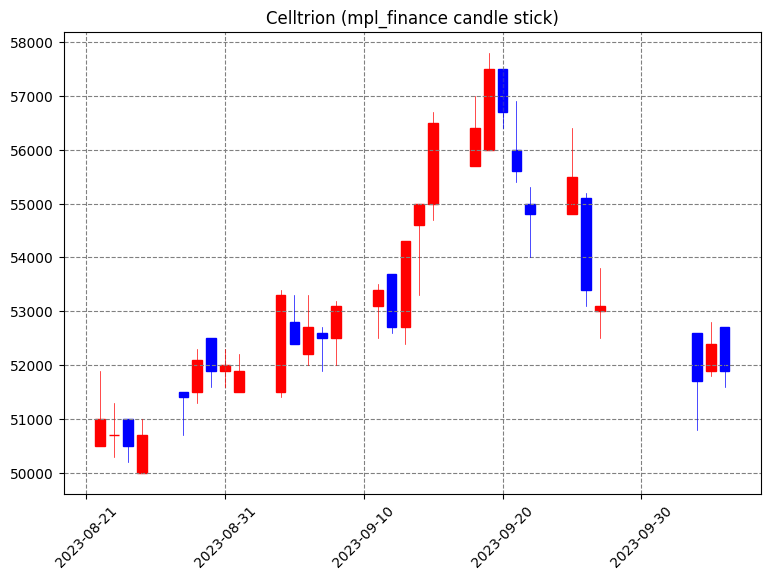

In [34]:
from mpl_finance import candlestick_ohlc

df = df.sort_values(by='날짜')

for idx in range(0, len(df)):
    # 날짜열을 datetime 형으로 변환.
    dt = datetime.strptime(df['날짜'].values[idx], '%Y.%m.%d').date()
    # datetime 형을 float 형으로 변환
    df['날짜'].values[idx] = mdates.date2num(dt)

# candlestick_ohlc()에서 요구하는 형식으로 변경
ohlc = df[['날짜','시가','고가','저가','종가']]

plt.figure(figsize=(9, 6))
ax = plt.subplot(1, 1, 1)
plt.title('Celltrion (mpl_finance candle stick)')

# candlestick_ohlc 함수를 이용하여 캔들차트를 그린다.
candlestick_ohlc(ax, ohlc.values, width=0.7, colorup='red', colordown='blue')

# x축의 레이블이 숫자. %Y-%m-%d 형식 문자열로 변환하여 표시
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(color='gray', linestyle='--')
plt.show()

## 웹 스크래핑 실습 : 금융 뉴스 텍스트 분석

### 01) 텍스트 마이닝을 위한 지식 : 토큰화

한국어 형태소 분석기 패키지 : konlpy


In [35]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 39.9 MB/s eta 0:00:00


OKT
- 1) morphs : 형태소 추출 (단어 토큰화)
- 2) pos : 품사 태깅(Part-of-speech tagging)
- 3) nouns : 명사 추출

In [36]:
from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

OKT 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 : [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 : ['코딩', '당신', '연휴', '여행']


kkma

In [37]:
print('꼬꼬마 형태소 분석 :',kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 품사 태깅 :',kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 명사 추출 :',kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

꼬꼬마 형태소 분석 : ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
꼬꼬마 품사 태깅 : [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]
꼬꼬마 명사 추출 : ['코딩', '당신', '연휴', '여행']


### 02) 텍스트 마이닝을 위한 지식 : 뉴스 본문 추출


뉴스 데이터 크롤링 패키지 : newspaper3k
- 전달받은 url로 뉴스 기사의 제목과 텍스트를 추출
- 임의의 뉴스를 선정하여 뉴스의 제목과 텍스트를 뽑아보자

In [38]:
pip install newspaper3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 25.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13541 sha256=c2a5b0372986af622e1c368f49281ff66e3c2d5bb84db1407388a6646b1959cc
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3339 sha256=2abdd62c7d17dc151b5140eec808440a901de7b1a2de8a62177b081e2f945f21
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc9

In [43]:
from newspaper import Article

# 파싱할 뉴스 기사 주소
url = 'https://biz.heraldcorp.com/view.php?ud=20231007000165'

# 언어가 한국어이므로 language='ko'로 설정
article = Article(url, language='ko')
article.download()
article.parse()

# 기사 내용 출력
print('기사 내용 :')
print(article.text)

기사 내용 :
[게티이미지뱅크]

[헤럴드경제=윤호 기자] 코스닥 2차전지 대표종목인 에코프로를 팔고 에코프로비엠을 매수하라는 증권가 리포트가 나왔지만, 투자자들은 정반대로 움직인 것으로 나타났다.

7일 업계에 따르면 김현수 하나증권 연구원은 지난 4일 리포트에서 “미국과 유럽이 원하는 공급망 구축 조건에 부합하는 기업들의 실적 및 밸류에이션 팩터(실적 대비 주가수준) 차별성은 더욱 부각될 것”이라며 “LG그룹, 포스코그룹, 에코프로그룹은 이런 공급망 요건을 가장 잘 충족하고 있다. 최선호주로 LG에너지솔루션, 포스코퓨처엠, 에코프로비엠을 유지한다”고 밝혔다.

다만 지주사 에코프로에 대해서는 “가파른 성장성을 최근 1년 주가 상승 국면에서 모두 반영했다”며 “매도 관점을 유지한다”고 강조했다.

특이한 점은 해당 리포트가 나온 4일, 투자자들은 정반대로 에코프로비엠을 대량 매도하고 에코프로로 옮겨갔다는 통계가 나온 것이다.

NH투자증권에 따르면 이날 에코프로비엠을 전량 매도한 투자자들 가운데 77.02%가 에코프로를 신규 매수했다. 에코프로를 신규매수한 투자자 가운데 에코프로비엠을 전량 매도한 투자자 비중은 28.47%로, 역시 전 종목 가운데 1위를 차지했다.

김 연구원은 “권역별 공급망, 수직 계열화, 리싸이클링(재활용) 조건을 모두 충족한 기업들이 글로벌 공급망 리스크 확대 및 이에 따른 전기차 수요 성장 둔화 리스크 확대 국면에서 안정적인 실적 성장이 가능할 것”이라며 “장기적으로 에코프로비엠이 경쟁사 대비 차별화된 실적 및 밸류에이션 팩터를 보여줄 것”이라고 봤다.

그러나 투자자들은 연내 에코프로머티리얼즈 상장으로 지주사 에코프로 주가에도 탄력이 붙을 것으로 보고 있다.

에코프로머티리얼즈는 이차전지 양극재에 들어가는 전구체를 만드는 에코프로그룹 핵심 계열사다. 최근 증권신고서를 제출하고 본격적인 상장 절차에 들어갔다. 오는 10월 30일부터 11월 3일까지 수요예측을 거쳐 공모가를 확정하고 11월 8∼9일 이틀간 일반 청약을 받을 방침이다.

### 03) Colab에서 한글 사용하기

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


AttributeError: ignored

### 04) 회사명과 종목 코드 얻기

각 회사명과 종목코드에 대한 정보가 필요
- kind라는 사이트에서 해당 정보가 적힌 테이블 사용
- https://kind.krx.co.kr/main.do?method=loadInitPage&scrnmode=1


In [45]:
import pandas as pd


In [46]:
dfstockcode = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]
dfstockcode

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,AJ네트웍스,95570,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,손삼달,http://www.ajnet.co.kr,서울특별시
1,BNK금융지주,138930,기타 금융업,금융지주회사,2011-03-30,12월,빈대인,http://www.bnkfg.com,부산광역시
2,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"최익훈, 정익희, 김회언 (각자 대표이사)",http://www.hdc-dvp.com,서울특별시
4,HD한국조선해양,9540,기타 금융업,"선박,해양구조물,엔진,펌프 전동기,중전기,중장비 제조/자동창고,물류시스템",1999-08-24,12월,"가삼현, 정기선 (각자 대표이사)",http://www.ksoe.co.kr,경기도
...,...,...,...,...,...,...,...,...,...
2635,지앤이헬스케어,299480,기타 섬유제품 제조업,면생리대,2018-06-29,12월,장영민,http://www.hannahpad.com,경기도
2636,카이바이오텍,446600,의약품 제조업,방사성 진단 및 치료 의약품,2022-12-23,12월,김영덕,http://www.kaibiotech.com/,전라북도
2637,코스텍시스템,169670,특수 목적용 기계 제조업,"반도체 웨이퍼 이송장비, 본딩장비",2022-01-21,12월,배준호,http://www.kosteks.com/,경기도
2638,타임기술,318660,소프트웨어 개발 및 공급업,"ILS(종합군수지원), IETM(전자식기술교범), CBT(전자식교보재), 기술번역",2021-06-24,12월,주양효,http://timett.co.kr,경상남도


In [47]:
dfstockcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회사명     2640 non-null   object
 1   종목코드    2640 non-null   int64 
 2   업종      2640 non-null   object
 3   주요제품    2625 non-null   object
 4   상장일     2640 non-null   object
 5   결산월     2640 non-null   object
 6   대표자명    2640 non-null   object
 7   홈페이지    2462 non-null   object
 8   지역      2640 non-null   object
dtypes: int64(1), object(8)
memory usage: 185.8+ KB


In [48]:
#  결측값의 개수를 확인
dfstockcode.isnull().sum()

회사명       0
종목코드      0
업종        0
주요제품     15
상장일       0
결산월       0
대표자명      0
홈페이지    178
지역        0
dtype: int64

- 회사명과 종목코드만 사용할 것이기에 결측값이 모두 0이므로 문제 없음
- 종목코드 6자리 맞추기 (0채우기)

In [49]:
dfstockcode.종목코드 = dfstockcode.종목코드.map('{:06d}'.format)
dfstockcode

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,AJ네트웍스,095570,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,손삼달,http://www.ajnet.co.kr,서울특별시
1,BNK금융지주,138930,기타 금융업,금융지주회사,2011-03-30,12월,빈대인,http://www.bnkfg.com,부산광역시
2,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"최익훈, 정익희, 김회언 (각자 대표이사)",http://www.hdc-dvp.com,서울특별시
4,HD한국조선해양,009540,기타 금융업,"선박,해양구조물,엔진,펌프 전동기,중전기,중장비 제조/자동창고,물류시스템",1999-08-24,12월,"가삼현, 정기선 (각자 대표이사)",http://www.ksoe.co.kr,경기도
...,...,...,...,...,...,...,...,...,...
2635,지앤이헬스케어,299480,기타 섬유제품 제조업,면생리대,2018-06-29,12월,장영민,http://www.hannahpad.com,경기도
2636,카이바이오텍,446600,의약품 제조업,방사성 진단 및 치료 의약품,2022-12-23,12월,김영덕,http://www.kaibiotech.com/,전라북도
2637,코스텍시스템,169670,특수 목적용 기계 제조업,"반도체 웨이퍼 이송장비, 본딩장비",2022-01-21,12월,배준호,http://www.kosteks.com/,경기도
2638,타임기술,318660,소프트웨어 개발 및 공급업,"ILS(종합군수지원), IETM(전자식기술교범), CBT(전자식교보재), 기술번역",2021-06-24,12월,주양효,http://timett.co.kr,경상남도


In [51]:
dfstockcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회사명     2640 non-null   object
 1   종목코드    2640 non-null   object
 2   업종      2640 non-null   object
 3   주요제품    2625 non-null   object
 4   상장일     2640 non-null   object
 5   결산월     2640 non-null   object
 6   대표자명    2640 non-null   object
 7   홈페이지    2462 non-null   object
 8   지역      2640 non-null   object
dtypes: object(9)
memory usage: 185.8+ KB


In [50]:
stock_to_code = dict(zip(dfstockcode.회사명, dfstockcode.종목코드))


In [52]:
stock_to_code['삼성전자']

'005930'

### 네이버 증권에서 주식정보 크롤링

In [59]:
##HTTP를 호출하는 프로그램을 작성할 때 주로 사용한다
import requests
## html의 내용을 사용자가 활용하기 쉽게 하기위해 사용한다
from bs4 import BeautifulSoup
##원하는 정보가 있는 주소
url = 'https://finance.naver.com/sise/sise_market_sum.naver?sosok=0'
## 브라우저 호환을 위해서 설정
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '+ \
    '(KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'
            }

##해당 url에 htlm(정보) 요청에사용 / url은 사용자가 원하는 url
r = requests.get(url, headers=headers, verify=True)
## 해당 url의 html을 사용자가 활용하기 쉽게 변환
html = BeautifulSoup(r.text, 'html.parser')
##html에 주식정보가 있는 tag이며 find_all이기 때문에 리스트형태
tmp = html.find_all('tr', {'onmouseover': "mouseOver(this)"})
##리스트 형태이기 때문에 for문 사용 (for는 반복문 : 파이썬기초)
for i in tmp:
    ##주식정보가 있는 태그가 'td'이면서 list의 첫번째
    tmp2 = i.find_all('td')[1]
    ##주식명이 tag 'a'에 존재
    name = tmp2.find('a').text
    ##주식가격이 i의 tag 'td'의 list 3번째에 존재
    price = int(i.find_all('td')[2].text.replace(',',''))
    print([name,price])

['삼성전자', 66000]
['LG에너지솔루션', 464000]
['SK하이닉스', 120400]
['삼성바이오로직스', 731000]
['삼성전자우', 53000]
['POSCO홀딩스', 514000]
['현대차', 192200]
['LG화학', 499500]
['기아', 85200]
['삼성SDI', 481000]
['NAVER', 190900]
['포스코퓨처엠', 333000]
['KB금융', 55800]
['현대모비스', 232000]
['셀트리온', 137000]
['삼성물산', 104700]
['카카오', 42050]
['신한지주', 35350]
['LG전자', 98200]
['삼성생명', 72000]
['SK이노베이션', 138700]
['LG', 81400]
['하나금융지주', 42800]
['삼성화재', 260000]
['포스코인터내셔널', 67000]
['KT&G', 85300]
['한국전력', 17560]
['메리츠금융지주', 53400]
['카카오뱅크', 23200]
['삼성에스디에스', 138800]
['SK텔레콤', 48350]
['고려아연', 488500]
['HD현대중공업', 111700]
['두산에너빌리티', 15440]
['SK', 134900]
['삼성전기', 131800]
['하이브', 229000]
['우리금융지주', 12310]
['기업은행', 11380]
['KT', 32900]
['S-Oil', 72900]
['대한항공', 21050]
['HMM', 15430]
['크래프톤', 149400]
['HD한국조선해양', 100700]
['TIGER CD금리투자KIS(합성)', 53130]
['현대글로비스', 183000]
['아모레퍼시픽', 116000]
['LG생활건강', 425000]
['SK바이오팜', 83900]


여러 페이지 주식정보 크롤링 하는 코드

In [ ]:
##HTTP를 호출하는 프로그램을 작성할 때 주로 사용한다
import requests
## html의 내용을 사용자가 활용하기 쉽게 하기위해 사용한다
from bs4 import BeautifulSoup
for j in range(1,37): ## page관련 추가된 코드
    ##원하는 정보가 있는 주소
    url = 'https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page=' + str(j) ## page관련 추가된 코드
    ## 브라우저 호환을 위해서 설정
    headers = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '+ \
        '(KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'
                }

    ##해당 url에 htlm(정보) 요청에사용 / url은 사용자가 원하는 url
    r = requests.get(url, headers=headers, verify=True)
    ## 해당 url의 html을 사용자가 활용하기 쉽게 변환
    html = BeautifulSoup(r.text, 'html.parser')
    ##html에 주식정보가 있는 tag이며 find_all이기 때문에 리스트형태
    tmp = html.find_all('tr', {'onmouseover': "mouseOver(this)"})
    ##리스트 형태이기 때문에 for문 사용 (for는 반복문 : 파이썬기초)
    for i in tmp:
        ##주식정보가 있는 태그가 'td'이면서 list의 첫번째
        tmp2 = i.find_all('td')[1]
        ##주식명이 tag 'a'에 존재
        name = tmp2.find('a').text
        ##주식가격이 i의 tag 'td'의 list 3번째에 존재
        price = int(i.find_all('td')[2].text.replace(',',''))
        print([name,price])

코스피/코스닥 전체 주식정보 크롤링 하는 방법

In [61]:
##HTTP를 호출하는 프로그램을 작성할 때 주로 사용한다
import requests
## html의 내용을 사용자가 활용하기 쉽게 하기위해 사용한다
from bs4 import BeautifulSoup
for k in [0,1]: ## sosok관련 추가된 코드
    if k == 0: ## sosok관련 추가된 코드
        last_page = 36 ## sosok관련 추가된 코드 코스피 마지막페이지
    else: ## sosok관련 추가된 코드
        last_page = 32 ## sosok관련 추가된 코드 코스닥 마지막페이지
    for j in range(1,last_page+1): ## sosok/page관련 추가된 코드
        ##원하는 정보가 있는 주소
        url = 'https://finance.naver.com/sise/sise_market_sum.naver?sosok=' +str(k) + '&page=' + str(j) ## sosok/page관련 추가된 코드
        ## 브라우저 호환을 위해서 설정
        headers = {
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '+ \
            '(KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'
                    }

        ##해당 url에 htlm(정보) 요청에사용 / url은 사용자가 원하는 url
        r = requests.get(url, headers=headers, verify=True)
        ## 해당 url의 html을 사용자가 활용하기 쉽게 변환
        html = BeautifulSoup(r.text, 'html.parser')
        ##html에 주식정보가 있는 tag이며 find_all이기 때문에 리스트형태
        tmp = html.find_all('tr', {'onmouseover': "mouseOver(this)"})
        ##리스트 형태이기 때문에 for문 사용 (for는 반복문 : 파이썬기초)
        for i in tmp:
            ##주식정보가 있는 태그가 'td'이면서 list의 첫번째
            tmp2 = i.find_all('td')[1]
            ##주식명이 tag 'a'에 존재
            name = tmp2.find('a').text
            ##주식가격이 i의 tag 'td'의 list 3번째에 존재
            price = int(i.find_all('td')[2].text.replace(',',''))
            print([name,price])

['삼성전자', 66000]
['LG에너지솔루션', 464000]
['SK하이닉스', 120400]
['삼성바이오로직스', 731000]
['삼성전자우', 53000]
['POSCO홀딩스', 514000]
['현대차', 192200]
['LG화학', 499500]
['기아', 85200]
['삼성SDI', 481000]
['NAVER', 190900]
['포스코퓨처엠', 333000]
['KB금융', 55800]
['현대모비스', 232000]
['셀트리온', 137000]
['삼성물산', 104700]
['카카오', 42050]
['신한지주', 35350]
['LG전자', 98200]
['삼성생명', 72000]
['SK이노베이션', 138700]
['LG', 81400]
['하나금융지주', 42800]
['삼성화재', 260000]
['포스코인터내셔널', 67000]
['KT&G', 85300]
['한국전력', 17560]
['메리츠금융지주', 53400]
['카카오뱅크', 23200]
['삼성에스디에스', 138800]
['SK텔레콤', 48350]
['고려아연', 488500]
['HD현대중공업', 111700]
['두산에너빌리티', 15440]
['SK', 134900]
['삼성전기', 131800]
['하이브', 229000]
['우리금융지주', 12310]
['기업은행', 11380]
['KT', 32900]
['S-Oil', 72900]
['대한항공', 21050]
['HMM', 15430]
['크래프톤', 149400]
['HD한국조선해양', 100700]
['TIGER CD금리투자KIS(합성)', 53130]
['현대글로비스', 183000]
['아모레퍼시픽', 116000]
['LG생활건강', 425000]
['SK바이오팜', 83900]
['금양', 110100]
['삼성중공업', 7190]
['DB손해보험', 89200]
['한화오션', 28800]
['SK스퀘어', 42700]
['유한양행', 77100]
['삼성엔지니어링', 2895

## 다우존스지수와 코스피지수의 변동률 비교
- 국내 주식과 미국 주식의 상관관계를 비교
- 2010년 6월 1일부터 현재까지 KOSPI 지수와 다우존스 지수 데이터

In [70]:
pip install -U finance-datareader

In [71]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [72]:
# 다우존스
dow = fdr.DataReader('DJI', '2010-06-01')
dow.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-01,10133.940430,10218.330078,10013.900391,10024.019531,10024.019531,221900000
2010-06-02,10025.610352,10254.219727,10025.610352,10249.540039,10249.540039,200850000
2010-06-03,10250.669922,10315.209961,10175.019531,10255.280273,10255.280273,176870000
2010-06-04,10249.610352,10249.690430,9889.879883,9931.969727,9931.969727,256600000
2010-06-07,9931.750000,9982.379883,9810.299805,9816.490234,9816.490234,222940000


In [73]:
# 코스피
kospi = fdr.DataReader('KS11', '2010-06-01')
kospi.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-01,1634.550049,1643.079956,1623.400024,1630.400024,1630.400024,314100.0
2010-06-03,1643.739990,1663.670044,1641.770020,1661.839966,1661.839966,308800.0
2010-06-04,1660.989990,1670.939941,1658.520020,1664.130005,1664.130005,286100.0
2010-06-07,1628.060059,1638.880005,1618.569946,1637.969971,1637.969971,300900.0
2010-06-08,1635.010010,1656.369995,1630.430054,1651.479980,1651.479980,280300.0


In [74]:
kospi.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-26,2493.639893,2495.000000,2461.590088,2462.969971,2462.969971,427500.0
2023-09-27,2447.989990,2469.719971,2445.510010,2465.070068,2465.070068,366200.0
2023-10-04,2435.780029,2435.780029,2402.840088,2405.689941,2405.689941,424900.0
2023-10-05,2423.350098,2426.610107,2402.500000,2403.600098,2403.600098,451700.0
2023-10-06,2408.810059,2421.179932,2403.919922,2408.729980,2408.729980,289400.0


In [75]:
kospi.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3.289000e+03
mean,2205.520871,2215.837023,2192.230052,2204.343754,2204.343754,4.987881e+05
std,353.195295,355.182038,350.966819,352.900068,352.900068,2.861733e+05
min,1474.449951,1516.750000,1439.430054,1457.640015,1457.640015,1.688000e+05
25%,1969.189941,1976.170044,1959.709961,1967.530029,1967.530029,3.245000e+05
50%,2070.439941,2079.850098,2059.459961,2068.889893,2068.889893,4.080000e+05
75%,2397.659912,2409.419922,2383.449951,2395.689941,2395.689941,5.719000e+05
max,3305.459961,3316.080078,3295.439941,3305.209961,3305.209961,3.455500e+06


In [76]:
kospi.index

DatetimeIndex(['2010-06-01', '2010-06-03', '2010-06-04', '2010-06-07',
               '2010-06-08', '2010-06-09', '2010-06-10', '2010-06-11',
               '2010-06-14', '2010-06-15',
               ...
               '2023-09-19', '2023-09-20', '2023-09-21', '2023-09-22',
               '2023-09-25', '2023-09-26', '2023-09-27', '2023-10-04',
               '2023-10-05', '2023-10-06'],
              dtype='datetime64[ns]', name='Date', length=3291, freq=None)

### 변동률 시각화
- matplotlib 패키지를 통해서 다우존스 지수와 코스피 지수를 시각화(종가기준)
- 다우존스 지수는 빨간색, 코스피 지수는 파란색

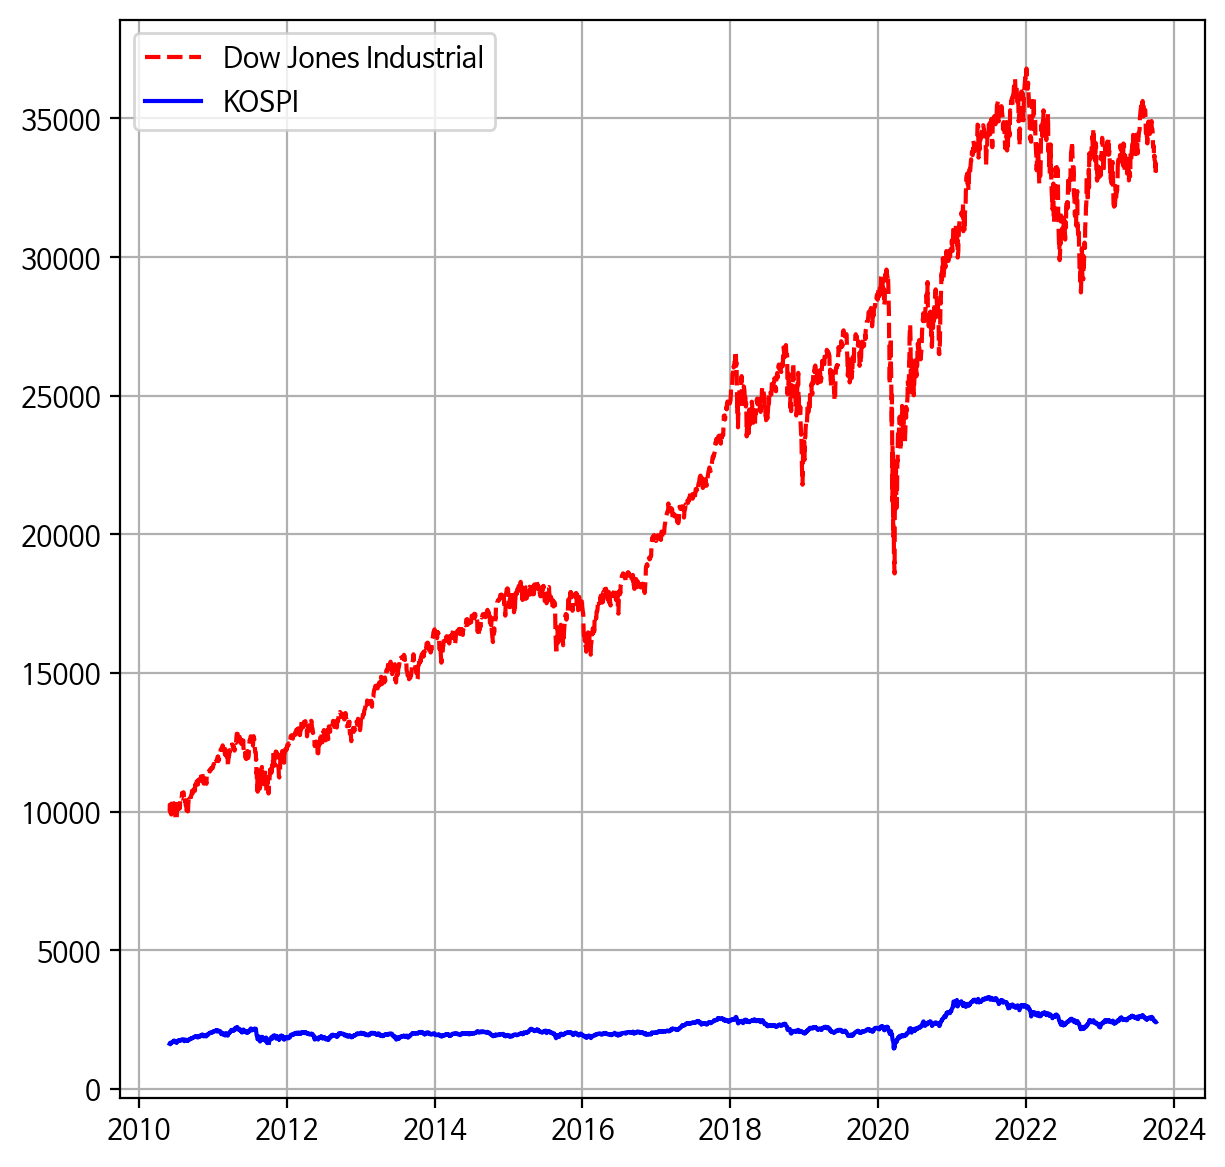

In [77]:
plt.figure(figsize=(7, 7))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

현재 종가를 특정 시점의 종가로 나누어 변동률을 구함
- 오늘의 종가를 특정일의 종가로 나눈 뒤 100을 곱하면, 특정일의 종가 대비 오늘 종가의 변동률

In [78]:
d = (dow.Close / dow.Close.loc['2010-06-01']) * 100
k = (kospi.Close / kospi.Close.loc['2010-06-01']) * 100


In [79]:
d

Date
2010-06-01    100.000000
2010-06-02    102.249801
2010-06-03    102.307066
2010-06-04     99.081708
2010-06-07     97.929680
                 ...    
2023-10-02    333.532386
2023-10-03    329.232987
2023-10-04    330.501658
2023-10-05    330.402093
2023-10-06    333.275270
Name: Close, Length: 3362, dtype: float64

In [80]:
k

Date
2010-06-01    100.000000
2010-06-03    101.928358
2010-06-04    102.068816
2010-06-07    100.464300
2010-06-08    101.292932
                 ...    
2023-09-26    151.065379
2023-09-27    151.194187
2023-10-04    147.552129
2023-10-05    147.423949
2023-10-06    147.738588
Name: Close, Length: 3291, dtype: float64

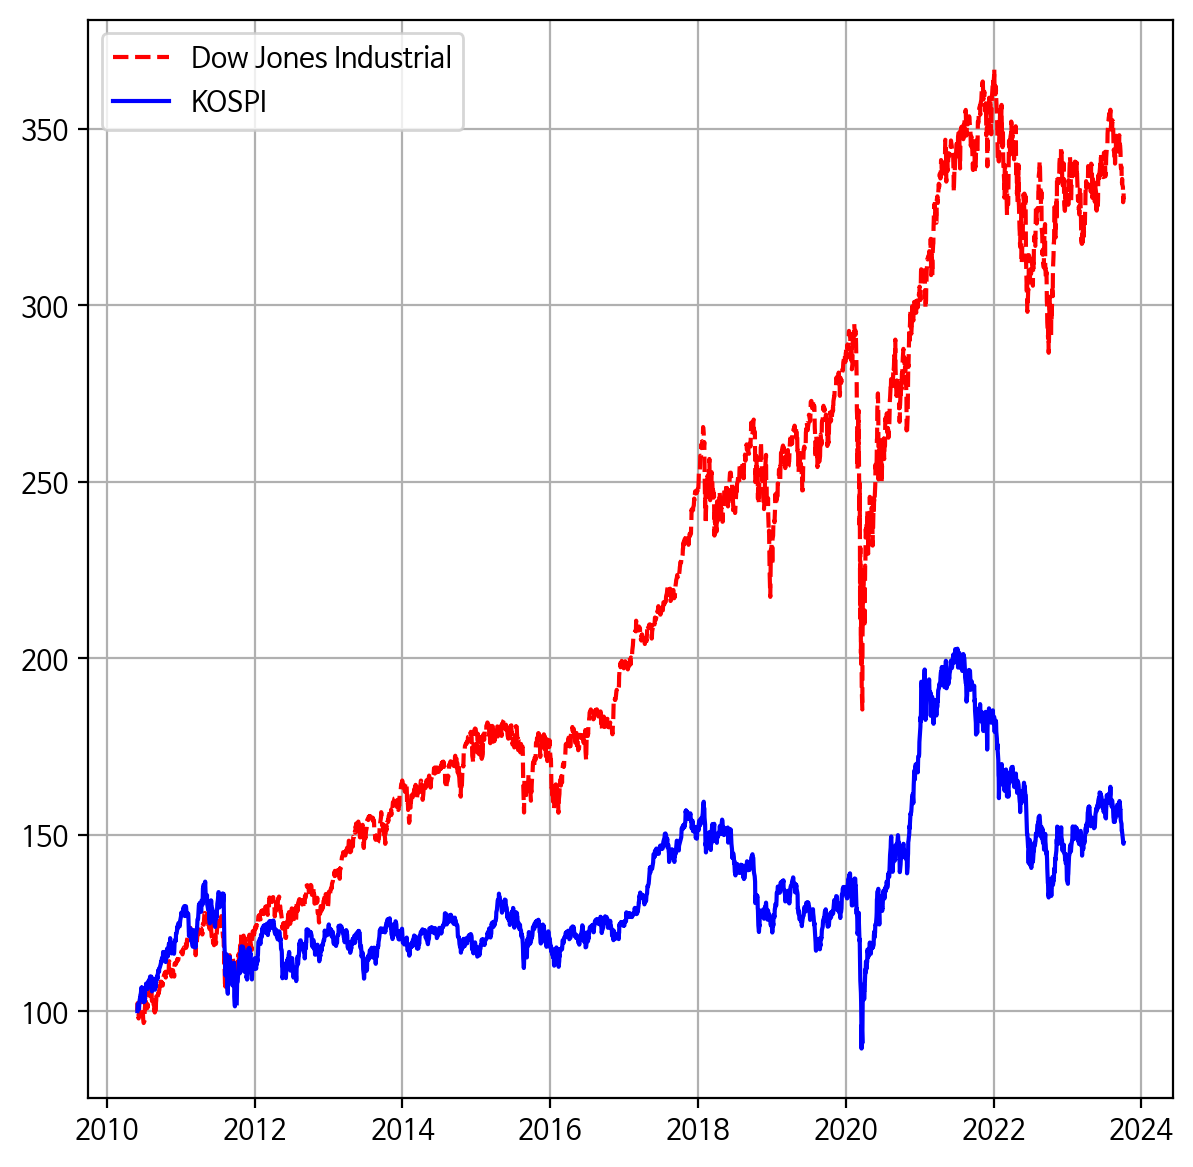

In [81]:
plt.figure(figsize=(7, 7))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

## 다우존스지수와 코스피지수의 산점도 시각화

In [82]:
print(len(dow))
print(len(kospi))

3362
3291


에러발생 : x와 y의 사이즈가 동일하지 않기 때문에

ValueError: ignored

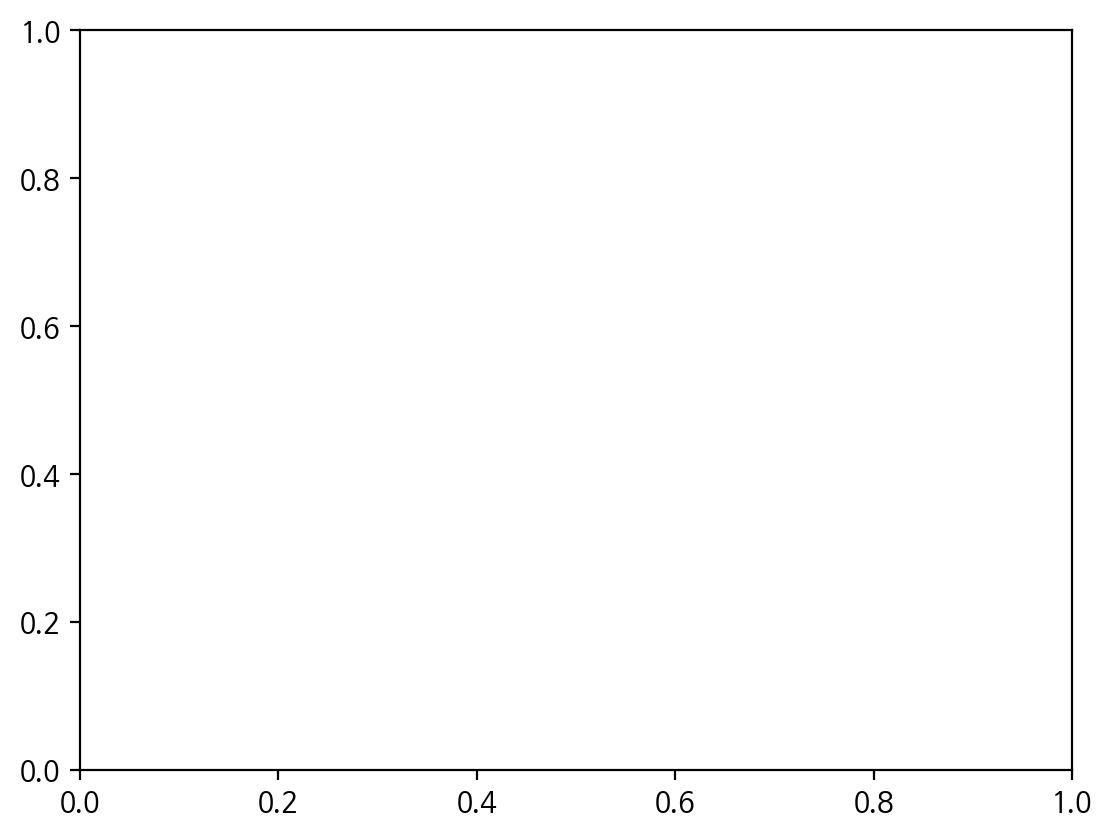

In [83]:
# plt.scatter(dow, kospi)

In [84]:
df = pd.DataFrame({'DOW' : dow['Close'], 'KOSPI' : kospi['Close']})
df

,DOW,KOSPI
Date,,
2010-06-01,10024.019531,1630.400024
2010-06-02,10249.540039,NaN
2010-06-03,10255.280273,1661.839966
2010-06-04,9931.969727,1664.130005
2010-06-07,9816.490234,1637.969971
...,...,...
2023-10-02,33433.351563,NaN
2023-10-03,33002.378906,NaN
2023-10-04,33129.550781,2405.689941


결측값의 개수 확인

In [85]:
df.isnull().sum()

DOW      103
KOSPI    176
dtype: int64

In [86]:
# 인수로 bfill(backward fill): 결측값 뒤에 있는 값으로 결측값을 덮어쓰기

df = df.fillna(method='bfill')
df



,DOW,KOSPI
Date,,
2010-06-01,10024.019531,1630.400024
2010-06-02,10249.540039,1661.839966
2010-06-03,10255.280273,1661.839966
2010-06-04,9931.969727,1664.130005
2010-06-07,9816.490234,1637.969971
...,...,...
2023-10-02,33433.351563,2405.689941
2023-10-03,33002.378906,2405.689941
2023-10-04,33129.550781,2405.689941


In [87]:
# 앞의 값으로 채운다
df = df.fillna(method='ffill')
df

,DOW,KOSPI
Date,,
2010-06-01,10024.019531,1630.400024
2010-06-02,10249.540039,1661.839966
2010-06-03,10255.280273,1661.839966
2010-06-04,9931.969727,1664.130005
2010-06-07,9816.490234,1637.969971
...,...,...
2023-10-02,33433.351563,2405.689941
2023-10-03,33002.378906,2405.689941
2023-10-04,33129.550781,2405.689941


In [88]:
df.isnull().sum()

DOW      0
KOSPI    0
dtype: int64

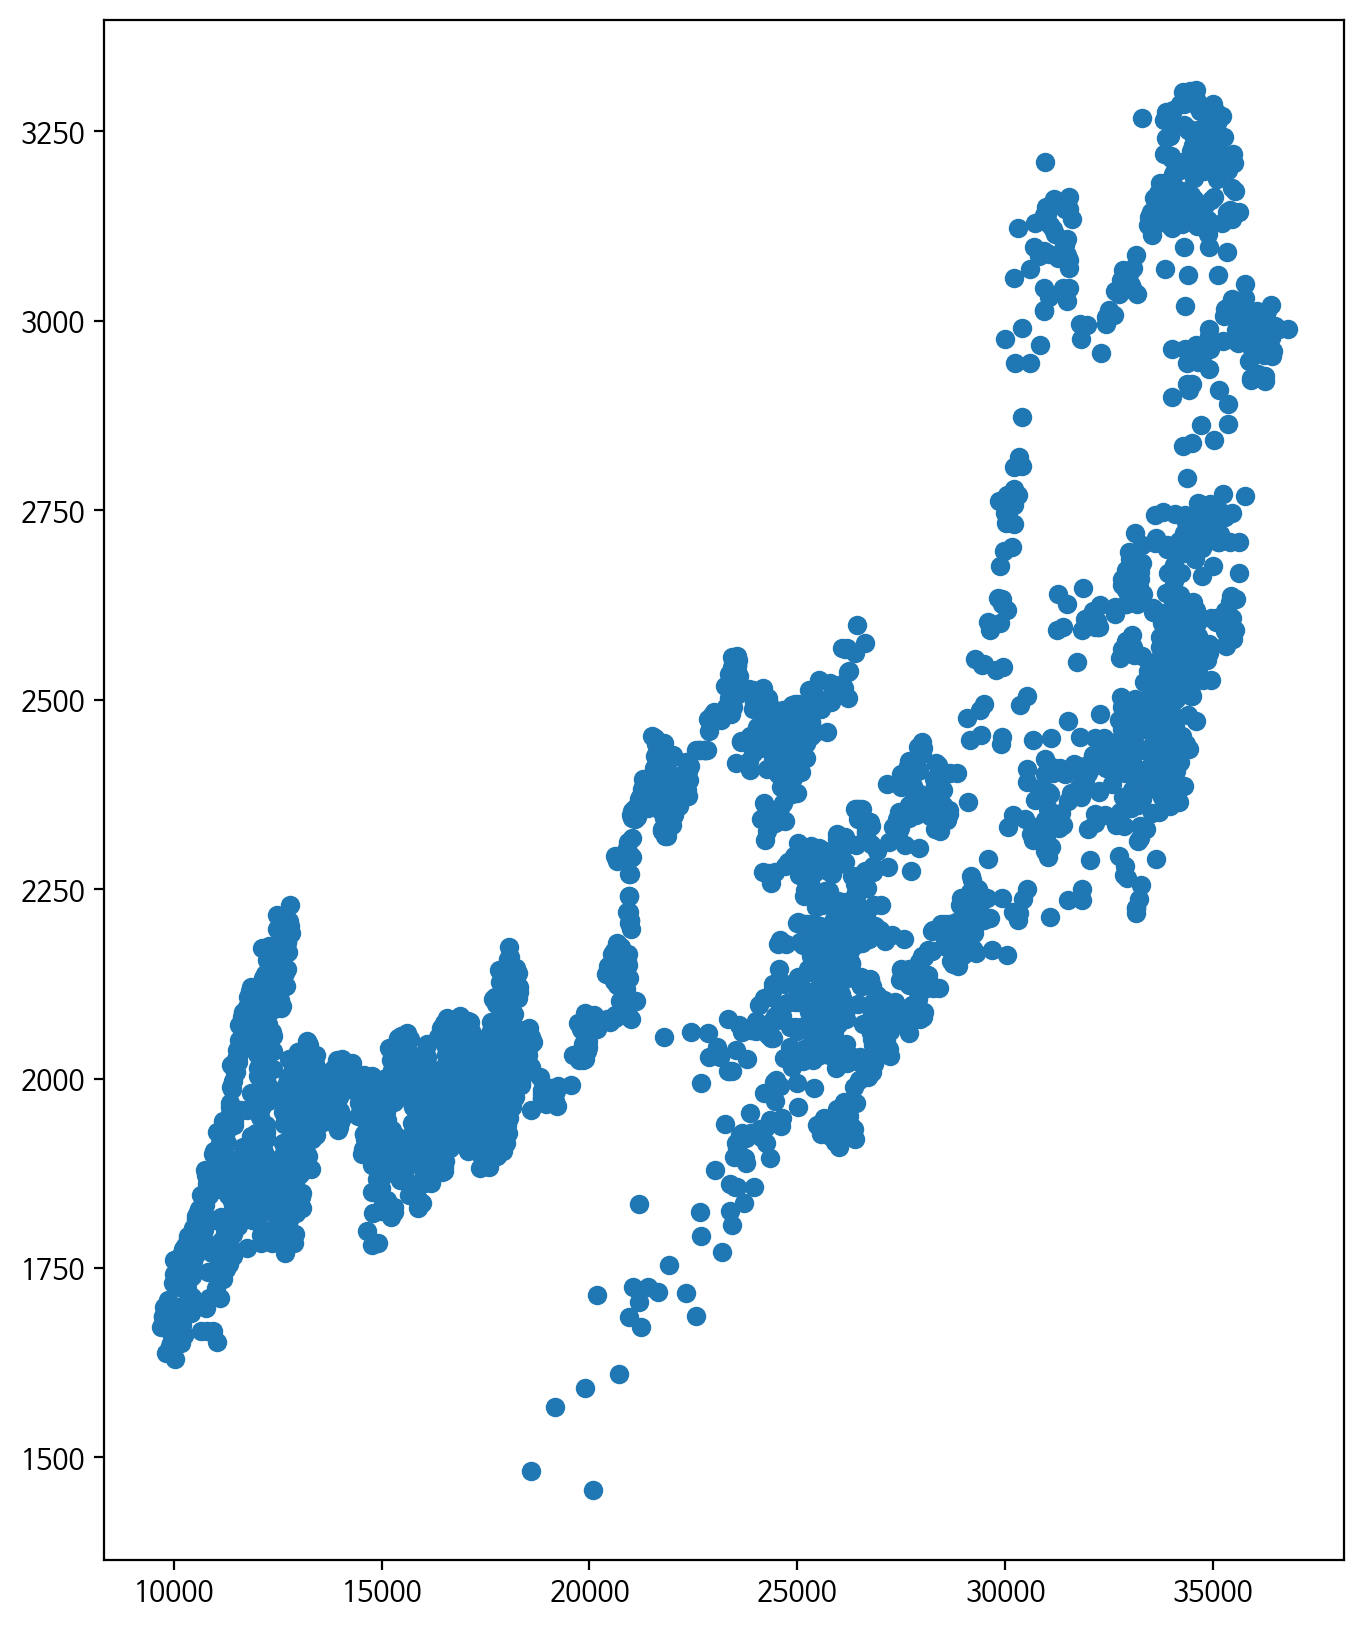

In [90]:
plt.figure(figsize=(8, 10))
plt.scatter(df['DOW'], df['KOSPI'])


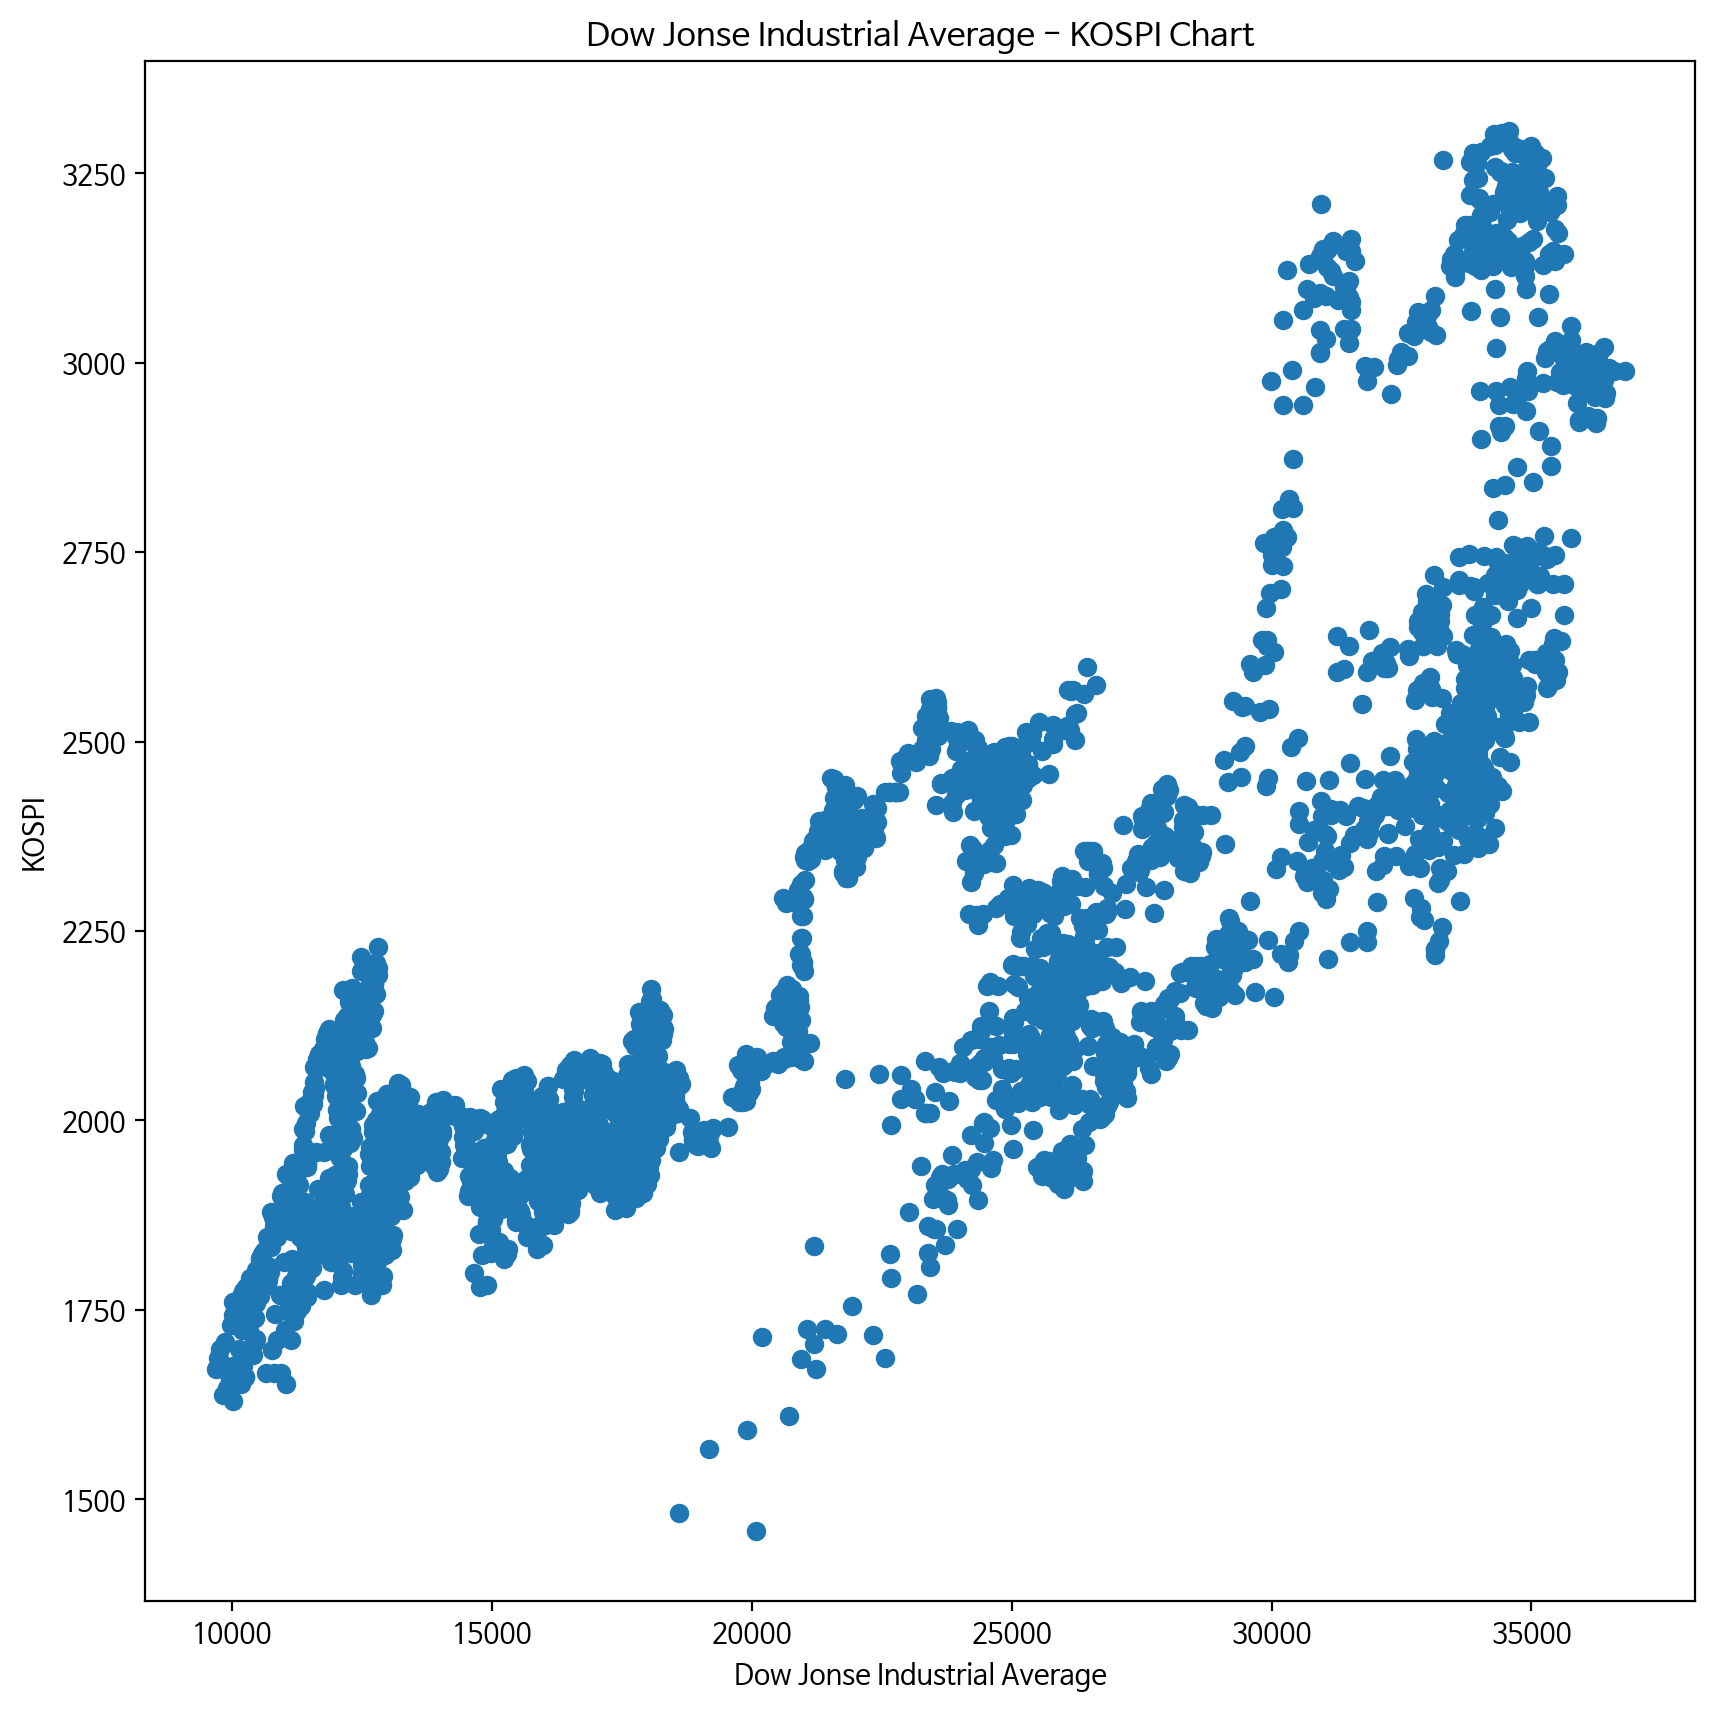

In [91]:
plt.figure(figsize=(10, 10))
plt.title('Dow Jonse Industrial Average - KOSPI Chart')
plt.xlabel('Dow Jonse Industrial Average')
plt.ylabel('KOSPI')
plt.scatter(df['DOW'], df['KOSPI'])

## 다우존스지수와 코스피지수의 선형회귀 , 상관계수 , 결정계수

### 사이파이를 이용한 선형회귀
- model = stats.linregress(독립 변수 x, 종속 변수 y)
- model.slope : 기울기
- model.intercept : y절편



In [92]:
# 사이파이 설치
!pip install scipy

In [101]:
from scipy import stats

In [93]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.822607
KOSPI,0.822607,1.000000


In [96]:
r_value = df['DOW'].corr(df['KOSPI'])
r_value

0.8226069233793947

In [97]:
r_squared = r_value ** 2
r_squared

0.6766821503917133

In [103]:
model = stats.linregress(df['DOW'], df['KOSPI'])
slope = model.slope
intercept = model.intercept

- 결정 계수가 1이면 선형 회귀 모델이 완벽하게 데이터를 설명한다는 의미
- 결정 계수가 0이면 선형 회귀 모델. 즉, 직선이 전혀 변수 사이의 관계를 설명하지 못한다는 의미

In [105]:
regr_line = f'Y = {slope:.2f} * X + {intercept:.2f}'

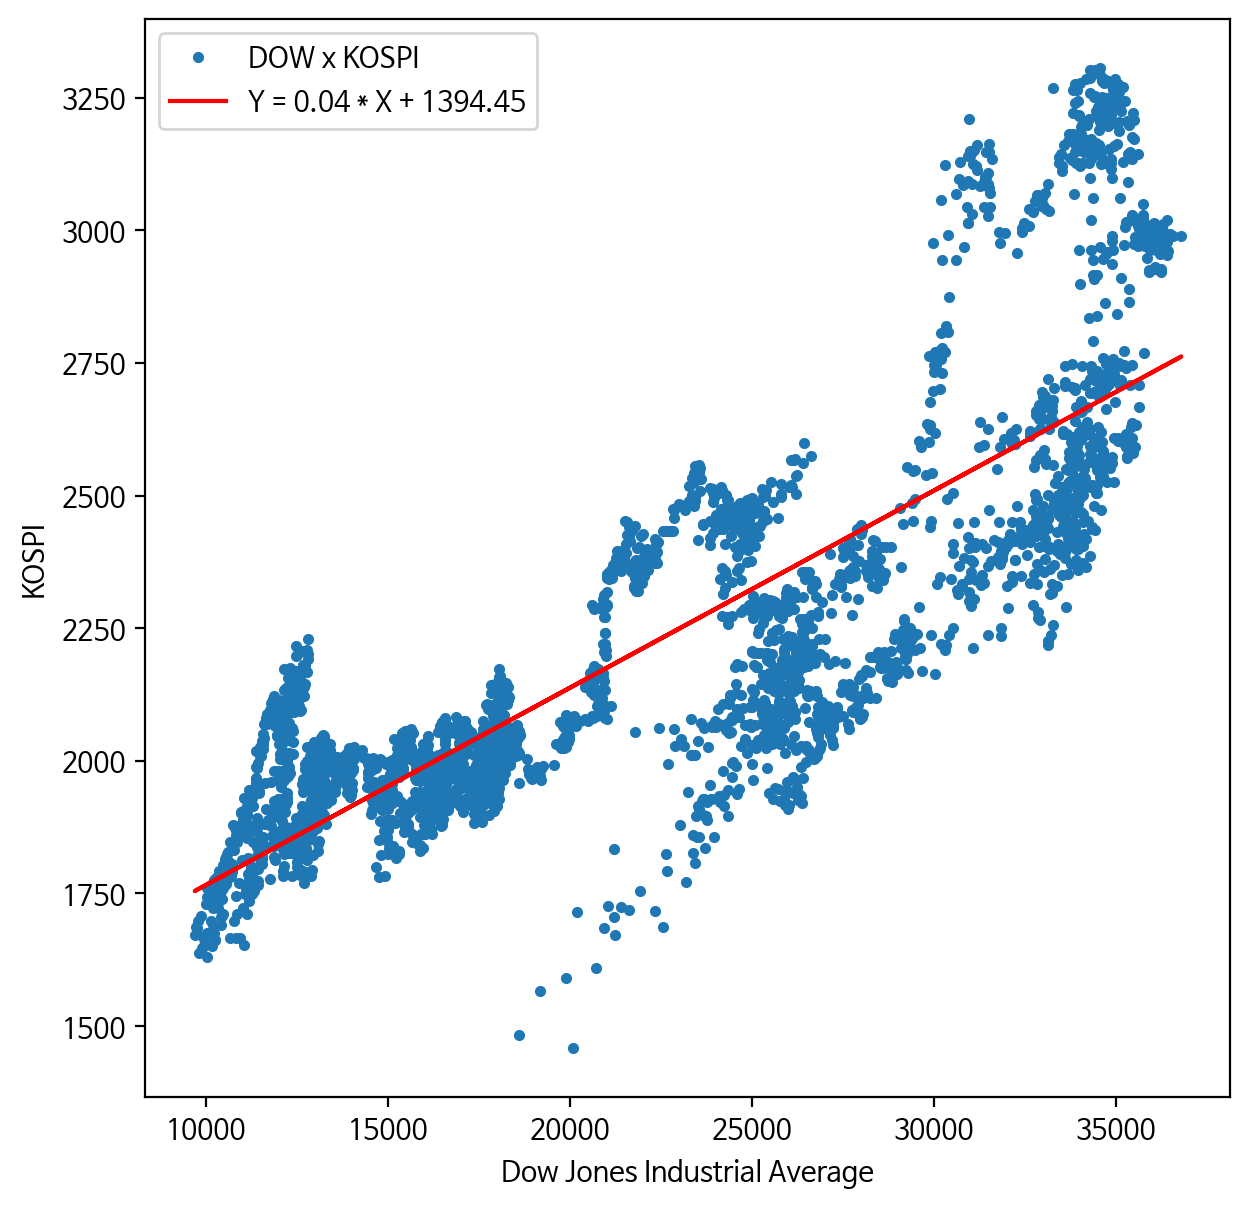

In [107]:
plt.figure(figsize=(7,7))
plt.plot(df['DOW'], df['KOSPI'], '.')
plt.plot(df['DOW'], slope * df['DOW'] + intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])

plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()